In [35]:
#from sklearn import linear_model
from sklearn.linear_model import LinearRegression
#from sklearn.linear_model import Ridge
from scipy import stats
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

## **Part 1**: Download and read the csv file

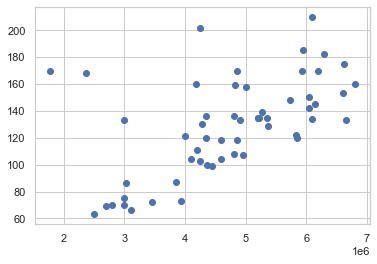

In [36]:
dfraw = pd.read_csv('data_assignment2.csv')

#Show an overview of the data before making a linear regression
plt.scatter(dfraw['Selling_price'],dfraw['Living_area'])

a)

<function matplotlib.pyplot.show(close=None, block=None)>

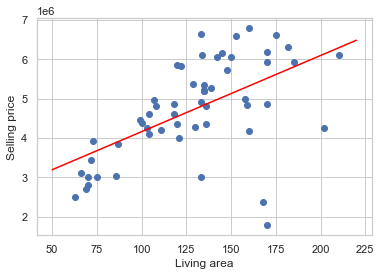

In [37]:
x_area = dfraw.loc[:,['Living_area']].values
y_selling = dfraw['Selling_price'].values
 
model = LinearRegression().fit(x_area,y_selling)

xfit = np.array([50,220])
yfit = model.predict(xfit[:,np.newaxis])

plt.scatter(x_area,y_selling)
plt.plot(xfit,yfit,color='red')

plt.xlabel("Living area")
plt.ylabel("Selling price")

plt.show


No handles with labels found to put in legend.


<function matplotlib.pyplot.show(close=None, block=None)>

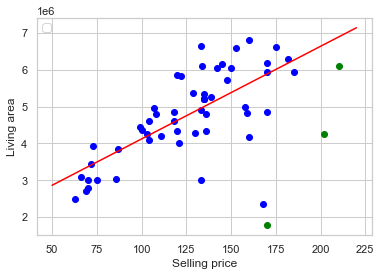

In [38]:

x_mean = dfraw['Living_area'].mean()
y_mean = dfraw['Selling_price'].mean()
x_2std = dfraw['Living_area'].std()*2
y_2std = dfraw['Selling_price'].std()*2

df_area = dfraw['Living_area']
df_price = dfraw['Selling_price']

df_outlier = dfraw[((df_area > x_mean + x_2std) | (df_area < x_mean - x_2std) |(df_price > y_mean + y_2std) | (df_price < y_mean - y_2std))]
df_cleaned = dfraw[((df_area < x_mean + x_2std) & (df_area > x_mean - x_2std) & (df_price < y_mean + y_2std) & (df_price > y_mean - y_2std))]

x_area = df_cleaned.loc[:,['Living_area']].values
y_selling = df_cleaned['Selling_price'].values

x_area_outlier = df_outlier.loc[:,['Living_area']].values
y_selling_outlier = df_outlier['Selling_price'].values
 
model = LinearRegression().fit(x_area,y_selling)

xfit = np.array([50,220])
yfit = model.predict(xfit[:,np.newaxis])

plt.scatter(x_area,y_selling, color='blue')
plt.scatter(x_area_outlier,y_selling_outlier, color='green')
plt.plot(xfit,yfit,color='red')


plt.xlabel("Selling price")
plt.ylabel("Living area")

plt.legend(loc='upper left')
plt.show

b)

In [39]:
#Slope of the line:
print('Slope of the line is:', model.coef_)

#Intercept of the line:
print('Intercept at:',  model.intercept_)


Slope of the line is: [25160.26380939]
Intercept at: 1606573.8212559996


c)

In [33]:
values = np.asarray([100,150,200])
value = model.predict(values[:,np.newaxis])

print('Selling price at 100 m^2:', int(value[0]) )
print('Selling price at 100 m^2:', int(value[1]) )
print('Selling price at 100 m^2:', int(value[2]) )

Selling price at 100 m^2: 4122600
Selling price at 100 m^2: 5380613
Selling price at 100 m^2: 6638626


d)

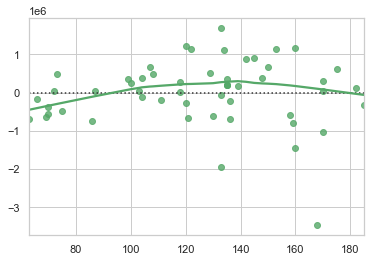

In [34]:
sns.residplot(x=x_area,y=y_selling, lowess=True, color="g")

plt.show()


e) compare regression lines, different outliers etc

2)

TypeError: cannot unpack non-iterable AxesSubplot object

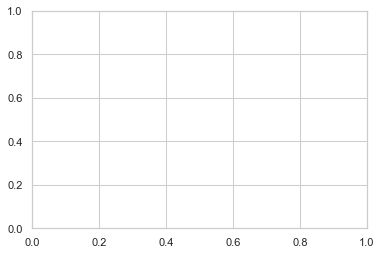

In [67]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix


iris = load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0, test_size=0.2)
class_names = iris.target_names

model = LogisticRegression(solver='liblinear', random_state=0).fit(X_train,y_train)

predic = model.predict(X_test)
matrix = confusion_matrix(y_test, predic)

fig, ax = plt.subplot()
ax.set_titel('Accuracy Score:', predic )
sns.heatmap(matrix, annot = True )

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
